In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm


In [83]:
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [44]:
df1 = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [11]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [12]:
categorical_columns = ["experience_level", "employment_type", "job_title",  
                       "salary_currency", "employee_residence", "company_location",  
                       "company_size", "remote_ratio"]  

data_dict = {col: df[col].unique().tolist() for col in categorical_columns}  
data_dict


{'experience_level': ['SE', 'MI', 'EN', 'EX'],
 'employment_type': ['FT', 'CT', 'PT', 'FL'],
 'job_title': ['AI Engineer',
  'Machine Learning Engineer',
  'Business Intelligence Developer',
  'Data Engineer',
  'Data Scientist',
  'Cloud Database Engineer',
  'Research Engineer',
  'Data Analyst',
  'Machine Learning Scientist',
  'Applied Scientist',
  'Data Science Manager',
  'Research Scientist',
  'Prompt Engineer',
  'Data Science',
  'Data Science Consultant',
  'Data Management Analyst',
  'Research Analyst',
  'Data Operations Analyst',
  'Data Management Consultant',
  'Business Intelligence Analyst',
  'Analytics Engineer',
  'Data Quality Analyst',
  'Data Architect',
  'Data Manager',
  'ML Engineer',
  'Robotics Software Engineer',
  'Machine Learning Researcher',
  'AI Architect',
  'Data DevOps Engineer',
  'Business Intelligence',
  'AI Software Engineer',
  'Data Integration Engineer',
  'Data Operations Specialist',
  'BI Analyst',
  'Data Product Manager',
  'Busin

## Data Dictionary

### 1. Experience Level (experience_level)
- SE - Senior (Highly experienced professional)
- MI - Mid-Level (Moderate experience)
- EN - Entry-Level (Beginner or early career)
- EX - Executive (Top-level management or leadership)
### 2. Employment Type (employment_type)
- FT - Full-Time (Permanent, full working hours)
- CT - Contract (Temporary employment)
- PT - Part-Time (Reduced working hours)
- FL - Freelance (Independent work, project-based)
### 3. Job Titles (job_title)
These are self-explanatory job roles related to AI, Data Science, and Analytics. Some notable ones:

AI Engineer, Machine Learning Engineer – Focus on AI model development.
Data Scientist, Data Analyst – Work with data for insights and predictions.
Business Intelligence Analyst – Analyze business data for decision-making.
Data Architect – Design data systems and infrastructure.
### 4. Salary Currency (salary_currency)
Currency codes are based on ISO 4217 standards (e.g., USD for US dollars, EUR for euros).

### 5. Employee Residence & Company Location (employee_residence, company_location)
These use country codes based on ISO 3166-1 alpha-2 (e.g., US for USA, GB for UK, IN for India).
Some examples from your dataset:
- US - United States
- GB - United Kingdom
- IN - India
- DE - Germany
- CN - China
- CL - Chile
- MD - Moldova
### 6. Company Size (company_size)
- L - Large (250+ employees)
- M - Medium (50-249 employees)
- S - Small (<50 employees)
### 7. Remote Ratio (remote_ratio)
- 0 - Fully On-Site
- 50 - Hybrid (Partially remote)
- 100 - Fully Remote

## Univariate and Bivariate analysis of salary_in_usd column


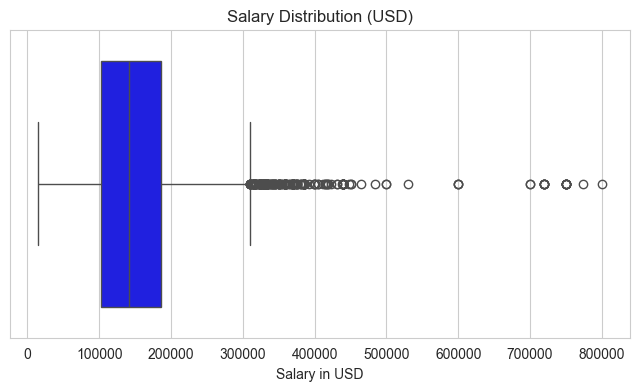

count     13972.000000
mean     150028.812124
std       68634.306349
min       15000.000000
25%      103000.000000
50%      141600.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

In [8]:


# Set style
sns.set_style("whitegrid")

# Summary statistics of salary in USD
salary_stats = df["salary_in_usd"].describe()

# Boxplot to check salary distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["salary_in_usd"], color="blue")
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.show()

# Show summary statistics
salary_stats


In [9]:
df['salary_currency'].unique()

array(['USD', 'EUR', 'GBP', 'CHF', 'CAD', 'NZD', 'AUD', 'INR', 'PLN',
       'BRL', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD', 'SGD', 'ILS',
       'THB', 'HUF', 'DKK', 'MXN', 'CLP'], dtype=object)

In [84]:
df['salary_currency'].value_counts()

salary_currency
USD    12876
GBP      522
EUR      414
INR       52
CAD       49
AUD       12
PLN        7
SGD        6
CHF        6
JPY        4
BRL        4
HUF        3
TRY        3
DKK        3
NOK        2
THB        2
NZD        1
ZAR        1
PHP        1
ILS        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64

In [85]:
df['company_location'].value_counts()

company_location
US    12220
GB      606
CA      354
ES      127
DE       96
      ...  
DZ        1
IQ        1
CN        1
CL        1
MD        1
Name: count, Length: 77, dtype: int64

In [86]:
df['employee_residence'].value_counts()

employee_residence
US    12171
GB      599
CA      352
ES      131
DE       89
      ...  
IQ        1
BG        1
JE        1
RS        1
LU        1
Name: count, Length: 88, dtype: int64

In [ ]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train = sm.add_constant(X_train)

C:\Users\vjha8\AppData\Local\Temp\ipykernel_13376\89706855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="experience_level", y="salary_in_usd", data=df, palette="coolwarm")


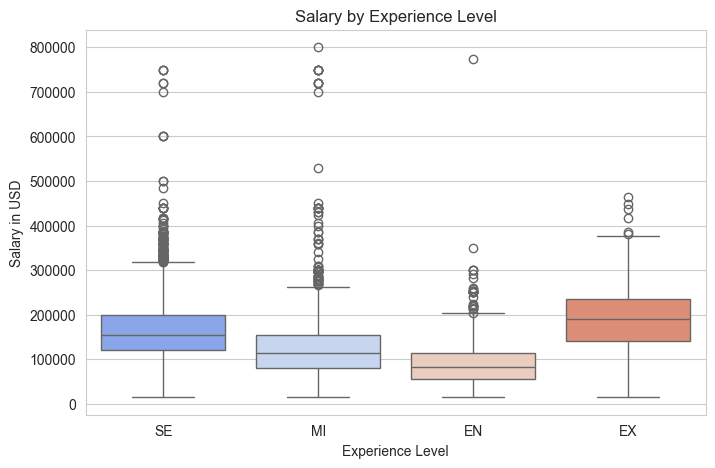

C:\Users\vjha8\AppData\Local\Temp\ipykernel_13376\89706855.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="job_title", y="salary_in_usd", data=df[df["job_title"].isin(top_jobs)], palette="viridis")


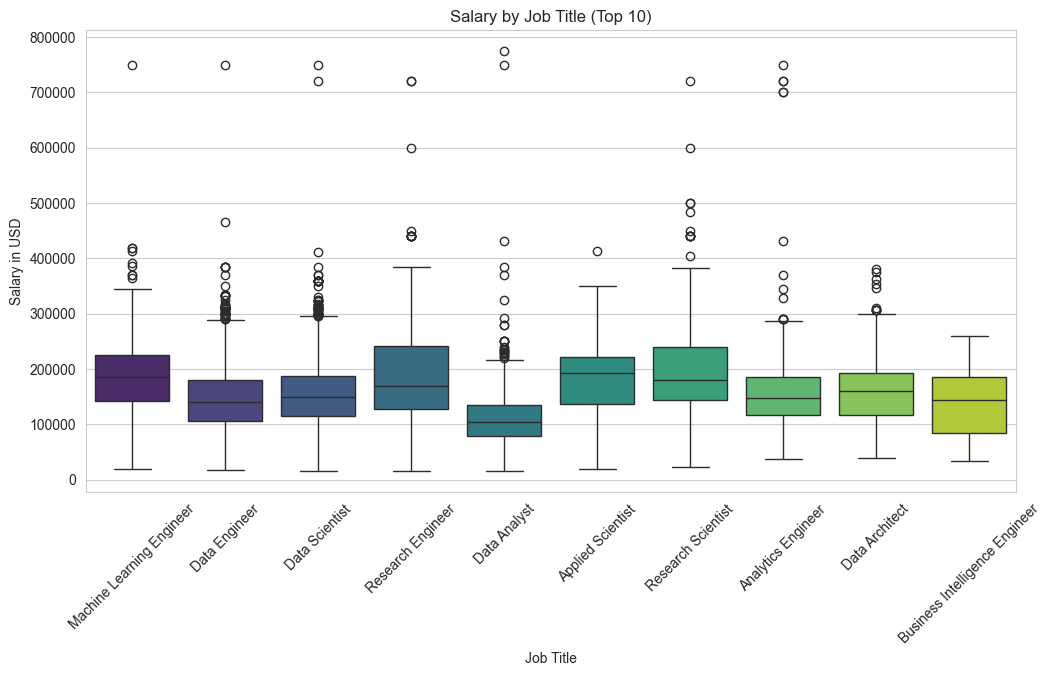

C:\Users\vjha8\AppData\Local\Temp\ipykernel_13376\89706855.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="company_size", y="salary_in_usd", data=df, palette="Set2")


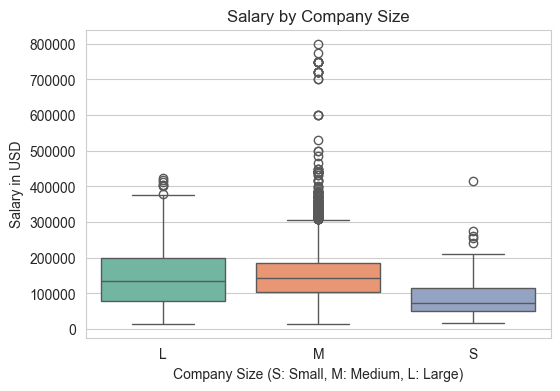

C:\Users\vjha8\AppData\Local\Temp\ipykernel_13376\89706855.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df, palette="pastel")


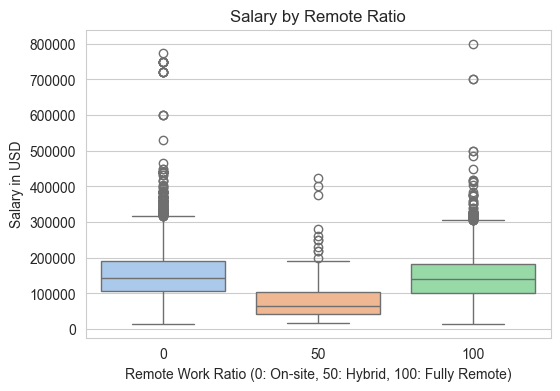

In [10]:
# Experience Level vs. Salary
plt.figure(figsize=(8, 5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df, palette="coolwarm")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

# Job Title vs. Salary (Top 10 job titles by count)
top_jobs = df["job_title"].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x="job_title", y="salary_in_usd", data=df[df["job_title"].isin(top_jobs)], palette="viridis")
plt.xticks(rotation=45)
plt.title("Salary by Job Title (Top 10)")
plt.xlabel("Job Title")
plt.ylabel("Salary in USD")
plt.show()

# Company Size vs. Salary
plt.figure(figsize=(6, 4))
sns.boxplot(x="company_size", y="salary_in_usd", data=df, palette="Set2")
plt.title("Salary by Company Size")
plt.xlabel("Company Size (S: Small, M: Medium, L: Large)")
plt.ylabel("Salary in USD")
plt.show()

# Remote Ratio vs. Salary
plt.figure(figsize=(6, 4))
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df, palette="pastel")
plt.title("Salary by Remote Ratio")
plt.xlabel("Remote Work Ratio (0: On-site, 50: Hybrid, 100: Fully Remote)")
plt.ylabel("Salary in USD")
plt.show()


## Key Findings from Visualizations:
- Experience Level: Higher experience levels (EX - Executive, SE - Senior) earn significantly more than MI (Mid-Level) and EN (Entry-Level).

- Job Titles: Some job roles, especially AI Engineer, Machine Learning Engineer, have higher salaries.

- Company Size: Larger companies (L) tend to pay more than medium (M) and small (S) companies.

- Remote Work: Fully remote (100%) employees tend to have competitive salaries, but some high salaries are seen in on-site (0%) roles too.

In [22]:
# It is also useful to check the correlation of the salary with any other numerical features the dataset may have.
# But in this case there are no numerical feature which can be correlated with the salary column meaningfully.
# Checking some basic things before making the regression model
df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Regression Modelling

To build a regressor to predict salary using all relevant columns, excluding salary, salary_currency, and salary_currency type, we can follow these steps:

1. **Data Preprocessing**
- Drop unnecessary columns (salary, salary_currency, salary_currency type).
- Convert categorical variables into numeric ones using one-hot encoding or Label Encoding.

In [32]:
# Drop unnecessary columns
df = df.drop(columns=['salary', 'salary_currency'])

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the preprocessed data
print(df_encoded.head())

   work_year  salary_in_usd  remote_ratio  experience_level_EX  \
0       2024          90000             0                False   
1       2024         180500             0                False   
2       2024          96200             0                False   
3       2024         235000             0                False   
4       2024         175000             0                False   

   experience_level_MI  experience_level_SE  employment_type_FL  \
0                False                 True               False   
1                False                 True               False   
2                False                 True               False   
3                False                 True               False   
4                False                 True               False   

   employment_type_FT  employment_type_PT  job_title_AI Developer  ...  \
0                True               False                   False  ...   
1                True               False           

2. **Split the Data into Features and Target**
- Features will include all columns except the target variable (salary_in_usd).
- Target will be the column salary_in_usd.

In [25]:
#Defining tagret and features
X = df_encoded.drop(columns="salary_in_usd")
y = df_encoded["salary_in_usd"]

3. **Split Data into Training & Testing Sets**
- To evaluate the model, we need to split the dataset into training and testing sets.

4. **create the regression model**

5. **Evaluate the Model**
- We can evaluate the performance of the model using metrics like R-squared and Mean Absolute Error (MAE)

In [ ]:

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Initialize the linear regressor
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Predict on test data
y_pred = model_lr.predict(X_test)

# Calculate MAE and R-squared

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 41900.7706254896
R-squared: 0.29074330261233705


In [36]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest Mean Absolute Error: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Absolute Error: 41546.950331606786
Random Forest R-squared: 0.29537738898359467


In [ ]:
# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f'Gradient Boosting Mean Absolute Error: {gb_mae}')
print(f'Gradient Boosting R-squared: {gb_r2}')


Gradient Boosting Mean Absolute Error: 42175.69194886678
Gradient Boosting R-squared: 0.2855511824355711


Three types of regression models have been used :
- **Linear Regressor**
- **Random Forest Regressor** 
A Random Forest Regressor is an ensemble learning method that works by constructing multiple decision trees during training time and outputting the average prediction of all trees. It helps to reduce overfitting and improves accuracy compared to a single decision tree by introducing randomness in tree creation.
- **Gradient Boosting Regressor**
A Gradient Boosting Regressor is another ensemble learning method that builds trees sequentially. Each new tree tries to correct the errors made by the previous one, focusing on harder-to-predict samples. It typically produces better results than Random Forest but can be more prone to overfitting.

**MAE** represents the average error between the predicted and actual salary values. Lower MAE is better, but the differences between these models aren't very significant here.
**R-squared** represents how well the model fits the data, with a higher value indicating a better fit. In your case, none of the models have a very high R-squared (around 0.29), suggesting that the models explain only a small portion of the variance in the salary data.

One more experiment can be done. There are some categorical columns which have natural order. Those columns can be encoded using ordinal encoding rather than one hot encoding. This will reduce the number of features and help us generalize the model better.

### Encoding Strategy

1. **Ordinal Encoding (Natural Order)**

- experience_level: ['EN' < 'MI' < 'SE' < 'EX'] (Entry < Mid < Senior < Executive)
- company_size: ['S' < 'M' < 'L'] (Small < Medium < Large)
- remote_ratio: [0 < 50 < 100] (Onsite < Hybrid < Fully Remote)

2. **One-Hot Encoding (Nominal Categories)**

- employment_type
- job_title
- employee_residence
- company_location


In [71]:

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
df = df1.copy()
# Drop unnecessary columns
df_model = df.drop(columns=['salary', 'salary_currency'])  # Exclude redundant salary columns

# Define ordinal encoding for ordered features
ordinal_cols = ['experience_level', 'company_size', 'remote_ratio']
ordinal_mapping = {
    'experience_level': ['EN', 'MI', 'SE', 'EX'],
    'company_size': ['S', 'M', 'L'],
    'remote_ratio': [0, 50, 100]
}

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])
df_model[ordinal_cols] = ordinal_encoder.fit_transform(df_model[ordinal_cols])

# Apply one-hot encoding to nominal features
onehot_cols = ['employment_type', 'job_title', 'employee_residence', 'company_location']
df_model = pd.get_dummies(df_model, columns=onehot_cols, drop_first=True)  # Avoid multicollinearity

# Features (X) and Target (y)
X = df_model.drop(columns=['salary_in_usd'])
y = df_model['salary_in_usd']

# Final dataset shape
print(f"Final dataset shape: {X.shape}")
X = X.astype('float32')
y= y.astype('float32')

Final dataset shape: (13972, 315)


Changing the encoding scheme does not help us reduce the number of features significantly. We will try reducing the dimensionality using:
- correlation
- VIF (Variance inflation factor)
- AIC 

Text(0.5, 1.0, 'Correlation Heatmap')

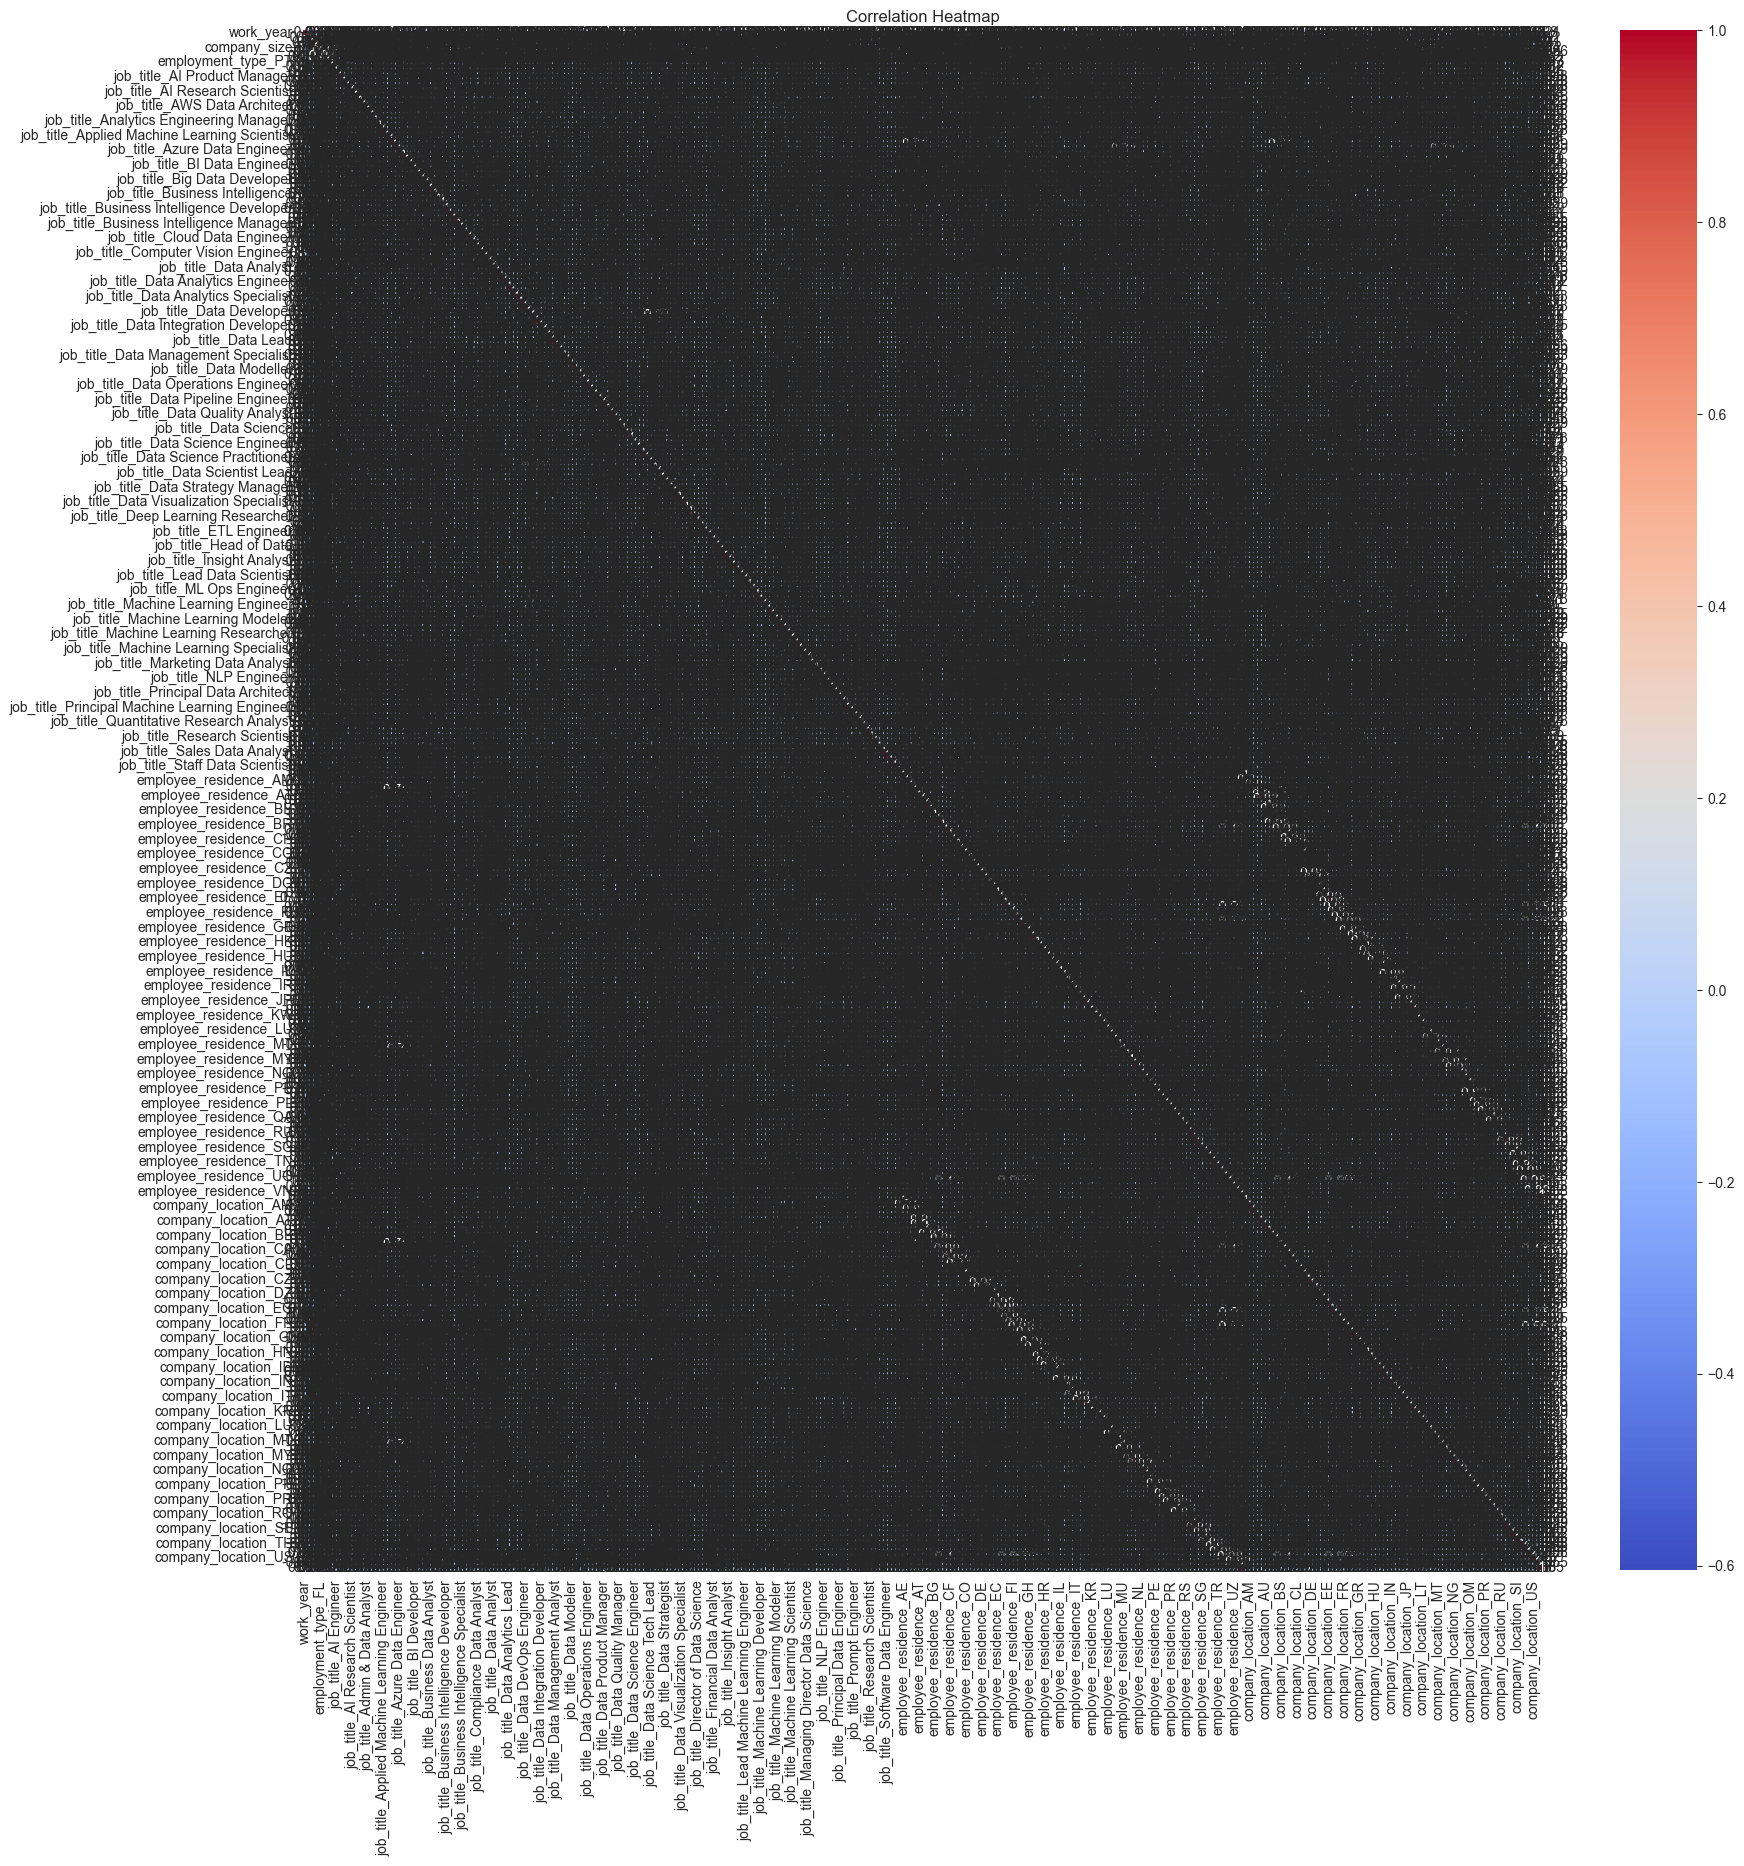

In [74]:
correlation =X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [78]:
# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Highly correlated features to drop: {to_drop}")

Highly correlated features to drop: ['company_location_AE', 'company_location_AU', 'company_location_BA', 'company_location_BR', 'company_location_BS', 'company_location_CA', 'company_location_CF', 'company_location_CH', 'company_location_CN', 'company_location_CO', 'company_location_DE', 'company_location_DZ', 'company_location_EC', 'company_location_EE', 'company_location_EG', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_HN', 'company_location_IE', 'company_location_IQ', 'company_location_IR', 'company_location_KE', 'company_location_KR', 'company_location_LB', 'company_location_LT', 'company_location_LV', 'company_location_MT', 'company_location_MU', 'company_location_MX', 'company_location_NL', 'company_location_NO', 'company_location_NZ', 'company_location_OM', 'company_location_PT', 'company_location_QA', 'company_location_SA', 'company_location_SI', 'company_location_UA', 'company_location_US', 'company_location_ZA

Highly correlated features to drop: ['company_location_AE', 'company_location_AU', 'company_location_BA', 'company_location_BR', 'company_location_BS', 'company_location_CA', 'company_location_CF', 'company_location_CH', 'company_location_CN', 'company_location_CO', 'company_location_DE', 'company_location_DZ', 'company_location_EC', 'company_location_EE', 'company_location_EG', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_HN', 'company_location_IE', 'company_location_IQ', 'company_location_IR', 'company_location_KE', 'company_location_KR', 'company_location_LB', 'company_location_LT', 'company_location_LV', 'company_location_MT', 'company_location_MU', 'company_location_MX', 'company_location_NL', 'company_location_NO', 'company_location_NZ', 'company_location_OM', 'company_location_PT', 'company_location_QA', 'company_location_SA', 'company_location_SI', 'company_location_UA', 'company_location_US', 'company_location_ZA']

In [87]:
# Drop highly correlated features
X_reduced = X.drop(to_drop, axis=1)
X_reduced.shape, y.shape

((13972, 273), (13972,))

In [88]:
# Compute absolute correlation matrix
corr_matrix = X_reduced.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Highly correlated features to drop: {to_drop}")

Highly correlated features to drop: []


In [89]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train = sm.add_constant(X_train)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to compute VIF scores
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF before regression
X_with_intercept = sm.add_constant(X_train)  # Add intercept
vif_df = calculate_vif(X_with_intercept)
print(vif_df.sort_values(by="VIF", ascending=False))


c:\Users\vjha8\Desktop\render-demo\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\vjha8\Desktop\render-demo\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                           Feature  VIF
252            company_location_HR  inf
251            company_location_HK  inf
253            company_location_HU  inf
25   job_title_Azure Data Engineer  inf
221          employee_residence_PR  inf
..                             ...  ...
216          employee_residence_OM  NaN
223          employee_residence_QA  NaN
225          employee_residence_RS  NaN
245            company_location_CL  NaN
250            company_location_GI  NaN

[274 rows x 2 columns]


In [91]:
import statsmodels.api as sm

# Stepwise feature elimination based on p-value
def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.10):
    """ Perform AIC-based feature selection by iteratively removing high p-value features """
    
    included = list(X.columns)  # Start with all features
    
    while True:
        #  Add intercept before fitting the model
        X_temp = sm.add_constant(X[included])  
        
        # Reset indices to avoid misalignment
        X_temp = X_temp.reset_index(drop=True)
        y_temp = y.reset_index(drop=True)

        # Fit model
        model = sm.OLS(y_temp, X_temp).fit()
        
        # Get p-values
        p_values = model.pvalues.iloc[1:]  # Ignore intercept
        
        # Find the worst predictor (highest p-value)
        worst_pval = p_values.max()
        
        # If the highest p-value is above threshold_out, remove it
        if worst_pval > threshold_out:
            worst_feature = p_values.idxmax()
            included.remove(worst_feature)
            print(f"Removing {worst_feature} (p-value = {worst_pval:.4f})")
        else:
            break
    
    return X[included]  #  Return correctly filtered X

# Run stepwise selection and get final selected features
X_selected = stepwise_selection(X_train, y_train)

# Fit the final reduced model
X_selected = sm.add_constant(X_selected)  # Add intercept again
final_model = sm.OLS(y_train.reset_index(drop=True), X_selected.reset_index(drop=True)).fit()
print(final_model.summary())  # Check new AIC and p-values


Removing employee_residence_BR (p-value = 0.9917)
Removing employee_residence_BO (p-value = 0.9938)
Removing employee_residence_NO (p-value = 0.9862)
Removing employment_type_FT (p-value = 0.9653)
Removing company_location_LU (p-value = 0.9579)
Removing employee_residence_HN (p-value = 0.9482)
Removing employee_residence_JE (p-value = 0.9786)
Removing job_title_Managing Director Data Science (p-value = 0.9453)
Removing job_title_Cloud Data Architect (p-value = 0.9403)
Removing employee_residence_EC (p-value = 0.9961)
Removing company_size (p-value = 0.9366)
Removing employee_residence_OM (p-value = 0.9744)
Removing employee_residence_MY (p-value = 0.9483)
Removing job_title_Marketing Data Scientist (p-value = 0.9683)
Removing company_location_AS (p-value = 0.9354)
Removing company_location_AT (p-value = 0.9147)
Removing employee_residence_EE (p-value = 0.9051)
Removing employee_residence_TH (p-value = 0.9066)
Removing employee_residence_LU (p-value = 0.9576)
Removing company_location_R

In [92]:
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     58.04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:33:27   Log-Likelihood:            -1.3780e+05
No. Observations:               11177   AIC:                         2.758e+05
Df Residuals:                   11074   BIC:                         2.766e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

It is quite significantly visible that inspite of using several techniques to reduce the multicollinearlity, dimensionality and improve r squared value, the model is still poorly performing. This may be reasoned to highly biased data towards US. almost 90% of the Data is from the US company or from the poeple residing in the US. This dataset is not suitable to predict the salary based on locations other than US. Therefore, It is better to try fitting the line after dropping columns like company_location, employee_residence etc.

In [ ]:
df = df1.copy()
df = df.drop(columns = ['company_location', 'employee_residence', 'salary_currency', 'salary'])

ordinal_cols = ['experience_level', 'company_size', 'remote_ratio']

# Define ordinal encoding for ordered features
ordinal_cols = ['experience_level', 'company_size', 'remote_ratio']
ordinal_mapping = {
    'experience_level': ['EN', 'MI', 'SE', 'EX'],
    'company_size': ['S', 'M', 'L'],
    'remote_ratio': [0, 50, 100]
}
# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])
df_model[ordinal_cols] = ordinal_encoder.fit_transform(df_model[ordinal_cols])

# Apply one-hot encoding to nominal features
onehot_cols = ['employment_type', 'job_title']
df_model = pd.get_dummies(df_model, columns=onehot_cols, drop_first=True)  # Avoid multicollinearity

# Features (X) and Target (y)
X = df_model.drop(columns=['salary_in_usd'])
y = df_model['salary_in_usd']

# Final dataset shape
print(f"Final dataset shape: {X.shape}")
X = X.astype('float32')
y= y.astype('float32')

ValueError: could not convert string to float: 'EN'

In [95]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,0,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,0,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,0,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,0,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,0,M
